In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 


Data Preprocessing:


1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary
.3
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential cluster
s5
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [4]:
df = pd.read_csv('EastWestAirlines1.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
df.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [8]:
df_D  = pd.DataFrame(df)

In [10]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [14]:
df.isna().sum()   # no missing values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

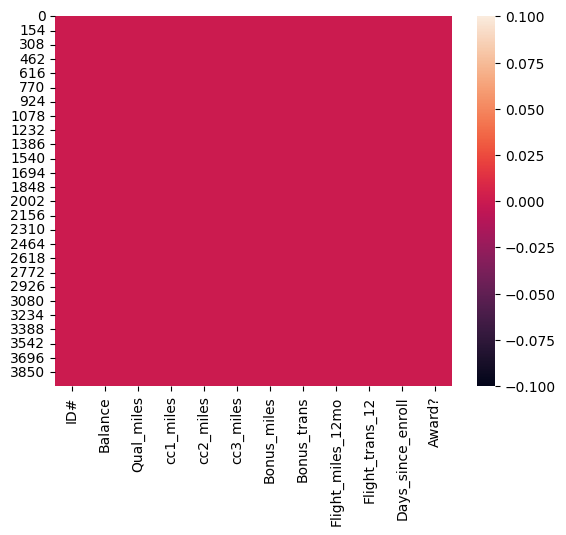

In [16]:
sns.heatmap(df.isna())   # no missing values

In [18]:
df['cc2_miles'].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [20]:
df['cc1_miles'].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [22]:
df['cc3_miles'].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [24]:
df['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [26]:
df.duplicated().sum()

0

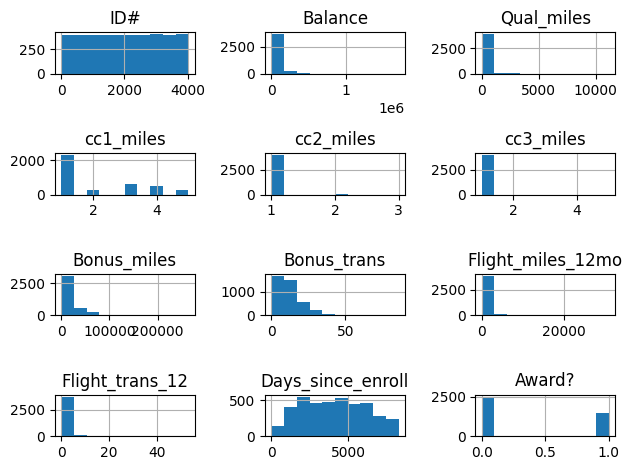

In [28]:
df.hist()
plt.tight_layout()

<Axes: >

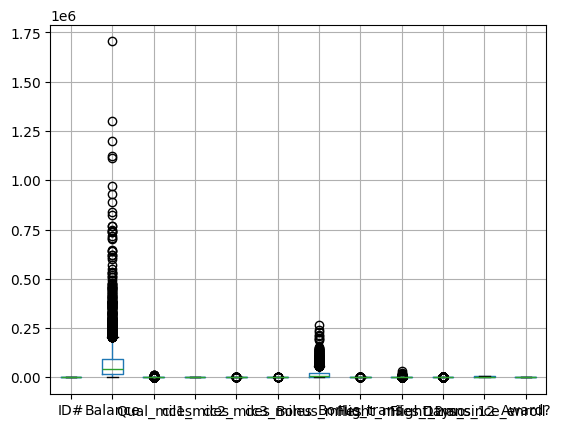

In [29]:
df.boxplot()


<Axes: >

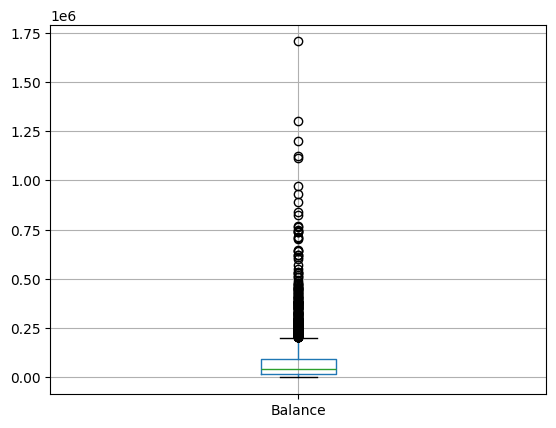

In [32]:
df.boxplot('Balance')

<Axes: >

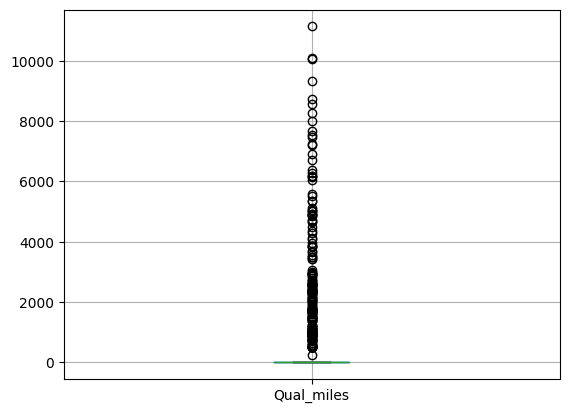

In [34]:
df.boxplot('Qual_miles')

<Axes: >

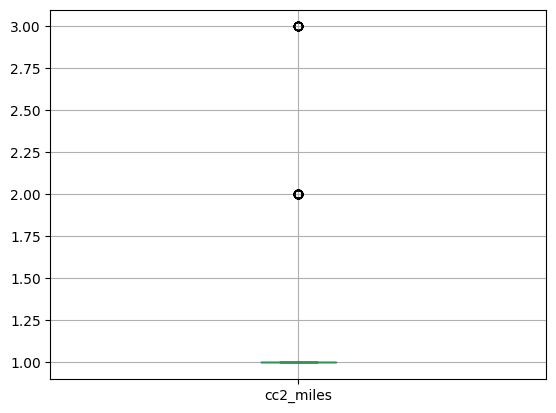

In [36]:
df.boxplot('cc2_miles')

<Axes: >

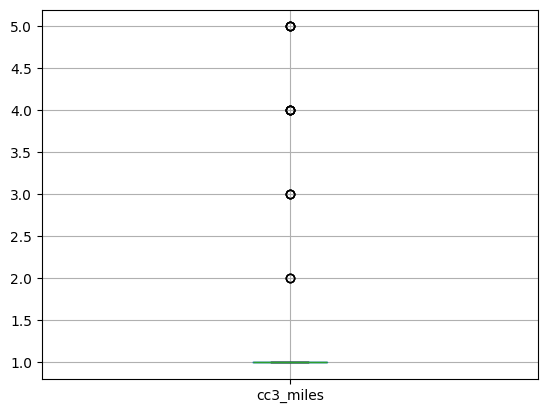

In [38]:
df.boxplot('cc3_miles')

<Axes: >

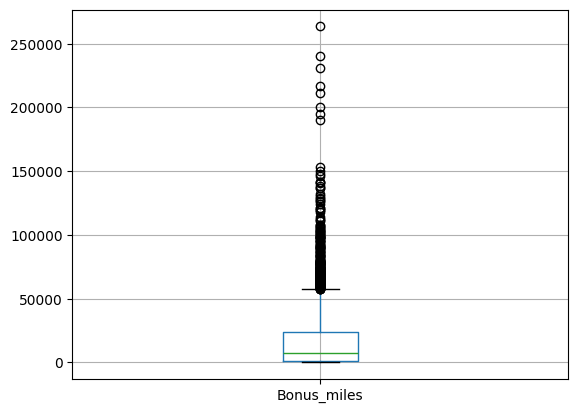

In [40]:
df.boxplot('Bonus_miles')

<Axes: >

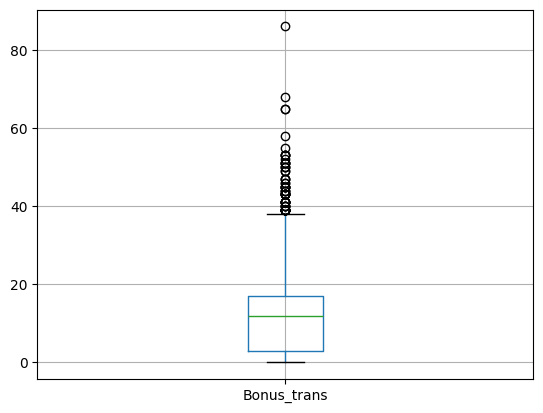

In [42]:
df.boxplot('Bonus_trans')

<Axes: >

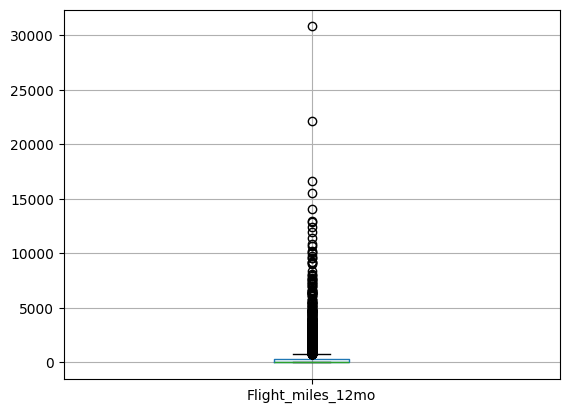

In [44]:
df.boxplot('Flight_miles_12mo')

<Axes: >

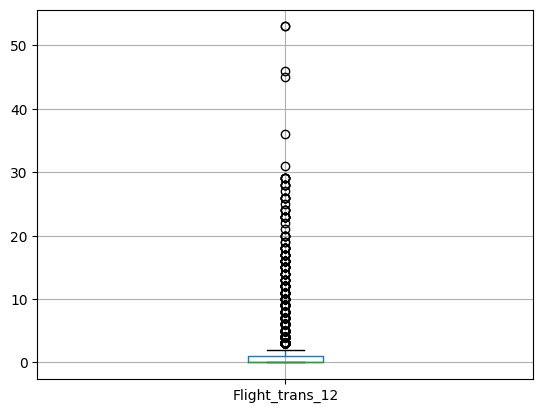

In [46]:
df.boxplot('Flight_trans_12')

<Axes: >

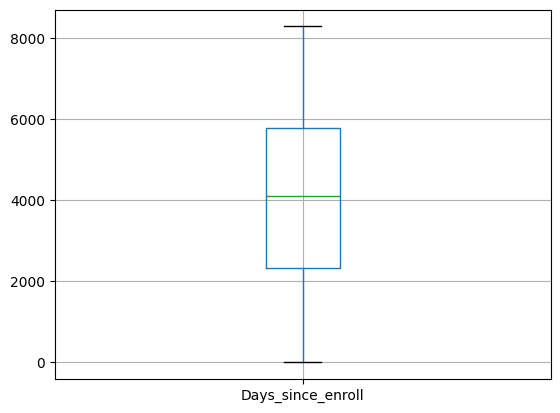

In [48]:
df.boxplot('Days_since_enroll')

In [50]:
# removing outliers
# 	Balance 	Qual_miles	cc2_miles	cc3_miles	Bonus_miles	 Bonus_trans 	Flight_miles_12mo	Flight_trans_12 	Days_since_enroll

In [52]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)

In [54]:
outlier_detection(df,'Balance')

lower_extreme:- -92287.25 , upper_extreme:- 203218.75 , q1:- 18527.5 , q3:- 92404.0


In [56]:
df.loc[df['Balance']>203218.75,'Balance'] = 203218.75

C:\Users\shubham\AppData\Local\Temp\ipykernel_16988\3273257899.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '203218.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Balance']>203218.75,'Balance'] = 203218.75


In [58]:
outlier_detection(df,'Qual_miles')

lower_extreme:- 0.0 , upper_extreme:- 0.0 , q1:- 0.0 , q3:- 0.0


In [60]:
df.loc[df['Qual_miles']>0.0,'Qual_miles'] = 0.0

In [62]:
outlier_detection(df,'cc2_miles')

lower_extreme:- 1.0 , upper_extreme:- 1.0 , q1:- 1.0 , q3:- 1.0


In [64]:
df.loc[df['cc2_miles']>1.0,'cc2_miles'] = 1.0

In [66]:
outlier_detection(df,'cc3_miles')

lower_extreme:- 1.0 , upper_extreme:- 1.0 , q1:- 1.0 , q3:- 1.0


In [68]:
df.loc[df['cc3_miles']>1.0,'cc3_miles'] = 1.0

In [70]:
outlier_detection(df,'Bonus_miles')

lower_extreme:- -32575.75 , upper_extreme:- 57626.25 , q1:- 1250.0 , q3:- 23800.5


In [72]:
df.loc[df['Bonus_miles']>57626.25,'Bonus_miles'] = 57626.25

C:\Users\shubham\AppData\Local\Temp\ipykernel_16988\3568225553.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57626.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Bonus_miles']>57626.25,'Bonus_miles'] = 57626.25


In [74]:
outlier_detection(df,'Bonus_trans')

lower_extreme:- -18.0 , upper_extreme:- 38.0 , q1:- 3.0 , q3:- 17.0


In [76]:
df.loc[df['Bonus_trans']>38.0,'Bonus_trans'] = 38.0

In [78]:
outlier_detection(df,'Flight_miles_12mo')

lower_extreme:- -466.5 , upper_extreme:- 777.5 , q1:- 0.0 , q3:- 311.0


In [80]:
df.loc[df['Flight_miles_12mo']>777.5,'Flight_miles_12mo'] = 777.5

C:\Users\shubham\AppData\Local\Temp\ipykernel_16988\1244863425.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '777.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Flight_miles_12mo']>777.5,'Flight_miles_12mo'] = 777.5


In [82]:
outlier_detection(df,'Flight_trans_12')

lower_extreme:- -1.5 , upper_extreme:- 2.5 , q1:- 0.0 , q3:- 1.0


In [84]:
df.loc[df['Flight_trans_12']>2.5,'Flight_trans_12'] = 2.5

C:\Users\shubham\AppData\Local\Temp\ipykernel_16988\1333073735.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Flight_trans_12']>2.5,'Flight_trans_12'] = 2.5


In [86]:
outlier_detection(df,'Days_since_enroll')

lower_extreme:- -2860.75 , upper_extreme:- 10981.25 , q1:- 2330.0 , q3:- 5790.5


In [88]:
df.loc[df['Days_since_enroll']>10981.25,'Days_since_enroll'] = 10981.25

C:\Users\shubham\AppData\Local\Temp\ipykernel_16988\1096283932.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10981.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Days_since_enroll']>10981.25,'Days_since_enroll'] = 10981.25


<Axes: >

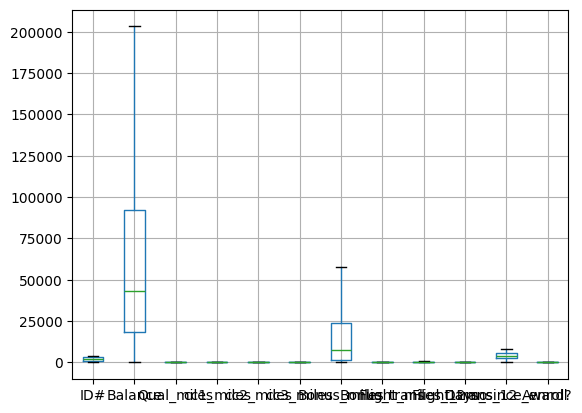

In [90]:
df.boxplot()

In [92]:
# features :- ID#	Balance	Qual_miles	cc1_miles	cc2_miles	cc3_miles	Bonus_miles	Bonus_trans	Flight_miles_12mo	Flight_trans_12	Days_since_enroll	Award?

In [94]:
df['ID#'].unique()

array([   1,    2,    3, ..., 4019, 4020, 4021], dtype=int64)

In [96]:
df['Balance'].unique()

array([28143., 19244., 41354., ..., 73597., 54899.,  3016.])

In [98]:
df['Qual_miles'].value_counts()  # drop this column

Qual_miles
0    3999
Name: count, dtype: int64

In [100]:
df['cc1_miles'].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [102]:
df['cc2_miles'].value_counts()   # drop this column

cc2_miles
1    3999
Name: count, dtype: int64

In [104]:
df['cc3_miles'].value_counts()    # drop this column

cc3_miles
1    3999
Name: count, dtype: int64

In [106]:
df['Flight_trans_12'].value_counts()

Flight_trans_12
0.0    2723
2.5     565
1.0     469
2.0     242
Name: count, dtype: int64

In [108]:
df['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [110]:
 df.drop(columns=['Qual_miles','cc2_miles','cc3_miles'],inplace=True)

In [112]:
df

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,1,174.0,1,0.0,0.0,7000.0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968.0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034.0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952.0,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935.0,1
...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403.0,1
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395.0,1
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402.0,1
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401.0,0


In [114]:
sc = StandardScaler()               # scale down the data
df_scaled = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [116]:
df_scaled

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.607258,-0.769578,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-1.734263,-0.758947,-0.769578,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-1.733402,-0.382070,-0.769578,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-1.732540,-0.835106,-0.769578,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,-1.731679,0.579265,1.409471,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.772038,-0.769578,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918
3995,1.725958,0.010506,-0.769578,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918
3996,1.726820,0.167530,0.683121,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918
3997,1.727682,-0.151188,-0.769578,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919


In [118]:
df_scaled.describe()

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,0.000000,-5.685763e-17,1.705729e-16,-2.842882e-17,2.842882e-17,-7.107204e-18,4.264322e-17,5.685763e-17,1.421441e-17
std,1.000125,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.735125,-1.086971e+00,-7.695784e-01,-8.527184e-01,-1.258576e+00,-6.043135e-01,-6.261434e-01,-1.993611e+00,-7.669193e-01
25%,-0.865331,-7.711597e-01,-7.695784e-01,-7.835524e-01,-9.294109e-01,-6.043135e-01,-6.261434e-01,-8.661823e-01,-7.669193e-01
50%,0.001017,-3.523592e-01,-7.695784e-01,-4.559271e-01,5.808475e-02,-6.043135e-01,-6.261434e-01,-1.092530e-02,-7.669193e-01
75%,0.866503,4.881053e-01,6.831212e-01,4.642292e-01,6.066935e-01,4.512077e-01,4.323844e-01,8.097050e-01,1.303918e+00
max,1.728543,2.377003e+00,2.135821e+00,2.335902e+00,2.910850e+00,2.034489e+00,2.020176e+00,2.023095e+00,1.303918e+00


Implementing Clustering Algorithms:

•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB

.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the dat

a.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


Model Building

In [122]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='single')) # single linkage

In [ ]:
# create clusters, suppose got input from customer that go for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean',linkage = 'single')

In [ ]:
hc

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(df_scaled) # apply fit_predict method on dataset df_scaled. We will get cluster nos. in y_hc
Clusters=pd.DataFrame(y_hc,columns=['Cluster_No']) # append those no. of cluster numbers create dataframe

In [ ]:
y_hc

In [852]:
Clusters  # Data point 0 belongs to 0th cluster, Data point 1 belongs to 3rd cluster

,Cluster_No
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [859]:
Clusters.value_counts()

Cluster_No
0             2518
1             1479
2                1
3                1
Name: count, dtype: int64

In [861]:
df_H = pd.DataFrame(df)

In [863]:
# Now let us map this cluster membership to the data points
df_H['h_clusterid'] = Clusters

In [865]:
df_H

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143.0,1,174.0,1,0.0,0.0,7000.0,0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968.0,0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034.0,0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952.0,0,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935.0,1,1
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403.0,1,1
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395.0,1,1
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402.0,1,1
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401.0,0,0


In [867]:
# East-West Airlines is trying to learn more about its customers.  Key issues are their flying patterns, earning and use of frequent flyer rewards, and use card. of the airline credit
#   The task is to identify customer segments via clustering.

In [869]:
#Field Name	Data Type	Max Data Length	Raw Data or Telcom Created Field?	Description
#ID#	NUMBER		Telcom	Unique ID
#Balance	NUMBER	8	Raw	Number of miles eligible for award travel
#Qual_miles	NUMBER	8	Raw	Number of miles counted as qualifying for Topflight status
#cc1_miles	CHAR	1	Raw	Number of miles earned with freq. flyer credit card in the past 12 months:
#cc2_miles	CHAR	1	Raw	Number of miles earned with Rewards credit card in the past 12 months:
#cc3_miles	CHAR	1	Raw	Number of miles earned with Small Business credit card in the past 12 months:
#   note:  miles bins:				1 = under 5,000
#				2 = 5,000 - 10,000
#				3 = 10,001 - 25,000
#				4 = 25,001 - 50,000
#				5 = over 50,000
#Bonus_miles	NUMBER		Raw	Number of miles earned from non-flight bonus transactions in the past 12 months
#Bonus_trans	NUMBER		Raw	Number of non-flight bonus transactions in the past 12 months
#Flight_miles_12mo	NUMBER		Raw	Number of flight miles in the past 12 months
#Flight_trans_12	NUMBER		Raw	Number of flight transactions in the past 12 months
#Days_since_enroll	NUMBER		Telcom	Number of days since Enroll_date
#Award?	NUMBER		Telcom	Dummy variable for Last_award (1=not null, 0=null)


In [875]:
df1=df_H.sort_values("h_clusterid")
df1.iloc[:,[0 ,9]]

,ID#,h_clusterid
0,1,0
2494,2513,0
2495,2514,0
2496,2515,0
2497,2516,0
...,...,...
1043,1054,1
2589,2608,1
1999,2016,1
3583,3606,2


In [877]:
df1['h_clusterid'].value_counts()

h_clusterid
0    2518
1    1479
2       1
3       1
Name: count, dtype: int64

Model Building

In [879]:
# We don't know the no. of clusters. So let's use K-Means and elbow method to choose this number of optimal clusters.
from sklearn.cluster import KMeans

In [881]:
df_scaled

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.607258,-0.769578,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-1.734263,-0.758947,-0.769578,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-1.733402,-0.382070,-0.769578,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-1.732540,-0.835106,-0.769578,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,-1.731679,0.579265,1.409471,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.772038,-0.769578,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918
3995,1.725958,0.010506,-0.769578,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918
3996,1.726820,0.167530,0.683121,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918
3997,1.727682,-0.151188,-0.769578,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919


In [883]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [885]:
# Inertia measures how well a dataset was clustered by K-Means.
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance,
# and summing these squares across one cluster.
# A good model is one with low inertia AND a low number of clusters (K).

# To plot the elbow method graph, we need to compute the WCSS (Within Cluster Sum of Squares)
# Let us say max. no. of clusters could be 10.
# As we are going to have 10 iterations we are going to write a for loop to create a list of 10 WCSS for the no. of clusters


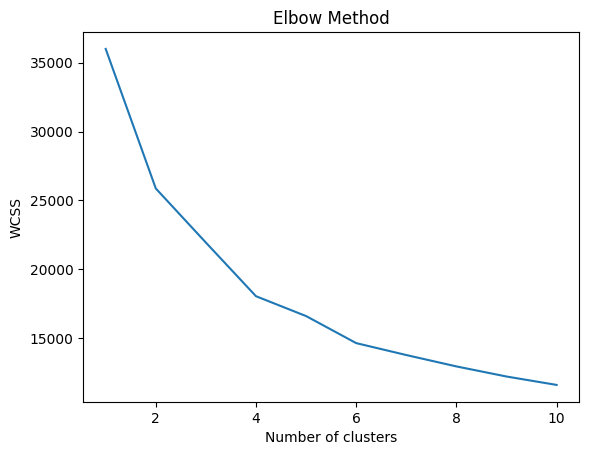

In [887]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(df_scaled) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.
    # In WCSS list we will append all distances i.e if cluster is 10 what is the value,
    # if 9 what is value and so on upto 1.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [889]:
#init='k-means++': init is random initialization method. We can choose random if choice of initial centroid is to be random.
# But as we don't want to fall into random initialization, we are going to use this initialization method.
# ‘k-means++’ : selects initial cluster centroids using sampling, based on an empirical probability distribution of the points’.
# It makes several trials at each sampling step and selects the best centroid among them.
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=init%7B'k%2Dmeans%2B%2B,contribution%20to%20the%20overall%20inertia.
# max_iter=300: Suppose dataset has 200 data points. We will make 10 clusters of 20 points each in 1st iteration. Such how many combinations you can form for data points?
# so default value is 300. so we will keep it as it is.
# random_state=0: Use an int to make the randomness deterministic i.e. same results every time. It determines random number generation for centroid initialization.


In [891]:
wcss

[35991.00000000002,
 25870.615630176573,
 21946.68940077263,
 18057.377484126046,
 16617.744986759866,
 14656.632953226363,
 13791.942533600642,
 12967.194124779122,
 12234.830080912425,
 11625.322039086954]

In [893]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict=kmeans.fit_predict(df_scaled)

In [895]:
predict

array([3, 3, 3, ..., 1, 1, 1])

In [897]:
predict.sum()

6020

In [899]:
clusters_new = KMeans(n_clusters=3, random_state=0)
new_predict=clusters_new.fit_predict(df_scaled)

In [901]:
new_predict

array([0, 0, 0, ..., 1, 1, 1])

In [903]:
new_predict.sum()

3751

In [905]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [907]:
df_K   = pd.DataFrame(df)

In [909]:
#Assign clusters to the data set
#df['k_means_cluster'] = clusters_new.labels_
df_K['k_means_cluster'] = new_predict

In [911]:
df_K

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_means_cluster
0,1,28143.0,1,174.0,1,0.0,0.0,7000.0,0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968.0,0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034.0,0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952.0,0,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935.0,1,2
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403.0,1,1
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395.0,1,1
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402.0,1,1
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401.0,0,1


In [915]:
df_K.groupby('k_means_cluster').mean('numeric_only')

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_means_cluster,,,,,,,,,
0,1082.526866,54240.725560,1.494030,6956.539552,8.473134,125.270149,0.432090,5737.994776,0.285075
1,3110.278239,37116.320836,1.378430,6083.887843,7.674537,100.153159,0.348756,2193.742821,0.205488
2,1586.878205,113705.977564,3.730769,39168.769918,20.596154,354.617674,1.135531,4893.416667,0.711538


In [917]:
df_K[df_K['k_means_cluster']==0]

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_means_cluster
0,1,28143.0,1,174.0,1,0.0,0.0,7000.0,0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968.0,0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034.0,0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952.0,0,0
5,6,16420.0,1,0.0,0,0.0,0.0,6942.0,0,0
...,...,...,...,...,...,...,...,...,...,...
2281,2299,89761.0,3,11965.0,13,0.0,0.0,3845.0,1,0
2289,2307,85496.0,1,2799.0,7,777.5,2.5,3820.0,0,0
2290,2308,49874.0,1,7200.0,9,777.5,2.5,3817.0,1,0
2293,2311,56688.0,1,3550.0,10,777.5,2.5,3812.0,1,0


In [921]:
df_K[df_K['k_means_cluster']==0].shape[0]

1340

In [923]:
df_K[df_K['k_means_cluster']==2]

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_means_cluster
4,5,97752.00,4,43300.00,26,777.5,2.5,6935.0,1,2
8,9,203218.75,3,1753.00,38,777.5,2.5,6948.0,1,2
9,10,104860.00,3,28426.00,28,777.5,2.5,6931.0,1,2
11,12,96522.00,5,57626.25,19,0.0,0.0,6924.0,1,2
15,16,28495.00,4,49442.00,15,0.0,0.0,6912.0,1,2
...,...,...,...,...,...,...,...,...,...,...
3908,3931,57642.00,4,52176.00,15,0.0,0.0,1564.0,1,2
3917,3940,130748.00,4,57626.25,37,777.5,2.5,1545.0,0,2
3930,3953,40424.00,4,44110.00,26,343.0,2.5,1523.0,1,2
3946,3969,139032.00,3,19565.00,17,777.5,2.5,1481.0,0,2


In [925]:
df_K[df_K['k_means_cluster']==2].shape[0]

1092

Model Building

In [934]:
from sklearn.cluster import DBSCAN

In [952]:
df_D   # dataframe , without treating outliers  , as DBSCAN is used to detect the outliers 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [986]:
x = sc.fit_transform(df_D)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [1031]:
db = DBSCAN(eps=0.5, min_samples=3) # default eps=0.5 minpts=3
a = db.fit(x)
a

DBSCAN(min_samples=3)

In [1033]:
a.labels_

array([ 0,  0,  0, ..., 56,  0,  0], dtype=int64)

In [1035]:
y = db.fit_predict(x)
y

array([ 0,  0,  0, ..., 56,  0,  0], dtype=int64)

In [1037]:
y.sum()

11916

In [992]:
y_d = pd.DataFrame(y)
y_d

,0
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,56
3997,0


In [994]:
y_d[0].unique()

array([ 0, -1,  1,  2,  3,  4,  6,  5,  7, 10,  8,  9, 12, 11, 13, 15, 14,
       16, 19, 17, 18, 20, 22, 21, 23, 24, 27, 25, 26, 28, 29, 30, 33, 32,
       35, 31, 36, 37, 34, 40, 39, 38, 41, 42, 45, 43, 44, 46, 48, 47, 51,
       50, 49, 52, 55, 53, 54, 56, 57, 58], dtype=int64)

Visualization:


Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


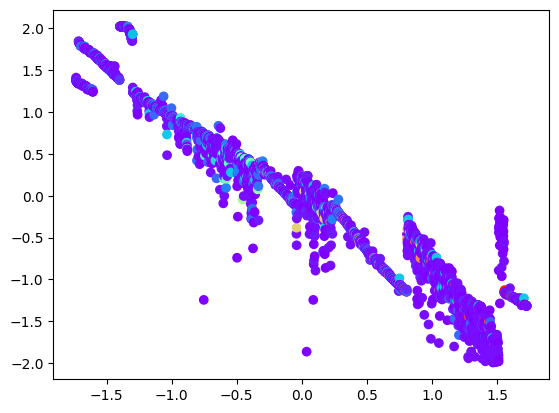

In [1009]:
plt.scatter(x[:,0],x[:,10],c=y,cmap='rainbow')   #  map between ID# and Days_since_enroll
# c=y i.e. give color coding to each data point depending upon which cluster it belong to
# In y we have cluster no for each data point and outlier information if it is -1
# plot of any 2 columns from x i.e. index 0 and 4 column
# clusters are overlapping, purple data points are far away so they are outliers. So not a goo model
# Confirm it with silhouette score

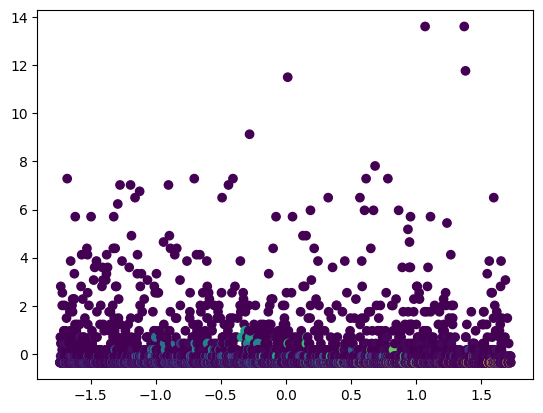

In [1040]:
plt.scatter(x[:,0],x[:,9],c=y,cmap='viridis')      # ID# and  Flight_trans_12

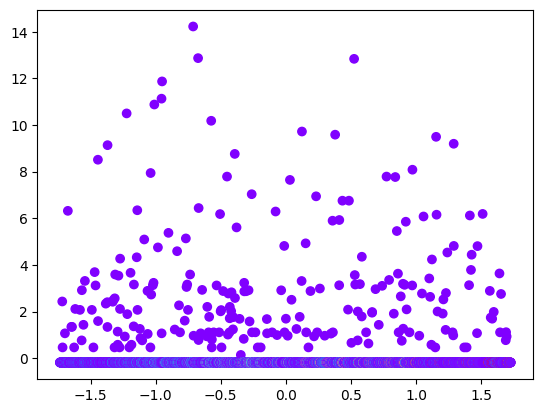

In [1029]:
plt.scatter(x[:,0],x[:,2],c=y,cmap='rainbow')     # ID# and Qual_miles

Evaluation and Performance Metrics:

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [1045]:
from sklearn.metrics import silhouette_score   # it is used to calculate accuracy

In [1049]:
silhouette_score(x,y) # parameters: x:standardized version of data, y:cluster lables
# score is near to zero i.e. clusters are overlapping

-0.3478675429153123

In [1051]:
# Hyperparameter Tuning

In [1057]:
# Selecting Min_samples or MinPts:

#Number of columns + 1: 12+1=13
#Number of columns * 2: 12*2=24
#Always keep min_samples at least 3

In [1059]:
#Find best eps value (K-dist Plot)

In [1063]:
from sklearn.neighbors import NearestNeighbors
# NearestNeighbors will calculate avg distance by considering nearest data point

In [1065]:
neighbor = NearestNeighbors(n_neighbors=3).fit(x) # fit will calculate distance using euclidean distance method
# n_neighbors:min sample. Calculate nearest 3 data points of each data point
# eps values will be selected randomly by algorithm

In [1067]:
# distances (calculated with eps value) are stored in neighbor
d,index = neighbor.kneighbors(x)
# kneighbors() will show distances.
# It returns 2 values, d:euclidean distances: 3 distances are there in every list as we have selected min sample as 3
# row index: which data point is close to which other data point

In [1069]:
neighbor.kneighbors(x)

(array([[0.        , 0.13537867, 0.13743479],
        [0.        , 0.11407578, 0.13743479],
        [0.        , 0.21956162, 0.27251935],
        ...,
        [0.        , 0.19523778, 0.32719285],
        [0.        , 0.28917928, 0.33007337],
        [0.        , 0.02752204, 0.06504268]]),
 array([[   0,    3,    1],
        [   1,    3,    0],
        [   2,   13,   98],
        ...,
        [3996, 3877, 3800],
        [3997, 3882, 3968],
        [3998, 3981, 3975]], dtype=int64))

In [1071]:
d

array([[0.        , 0.13537867, 0.13743479],
       [0.        , 0.11407578, 0.13743479],
       [0.        , 0.21956162, 0.27251935],
       ...,
       [0.        , 0.19523778, 0.32719285],
       [0.        , 0.28917928, 0.33007337],
       [0.        , 0.02752204, 0.06504268]])

In [1073]:
index

array([[   0,    3,    1],
       [   1,    3,    0],
       [   2,   13,   98],
       ...,
       [3996, 3877, 3800],
       [3997, 3882, 3968],
       [3998, 3981, 3975]], dtype=int64)

In [1075]:
d[:,1]

array([0.13537867, 0.11407578, 0.21956162, ..., 0.19523778, 0.28917928,
       0.02752204])

In [1082]:
distance = np.sort(d[:,1]) # consider all rows and 1st nearest neighbor values i.e.2nd column

In [1084]:
distance

array([2.42270462e-03, 2.42270462e-03, 4.69027727e-03, ...,
       6.66765339e+00, 6.68121018e+00, 7.58357087e+00])

Text(0.5, 1.0, 'K-Distance Graph')

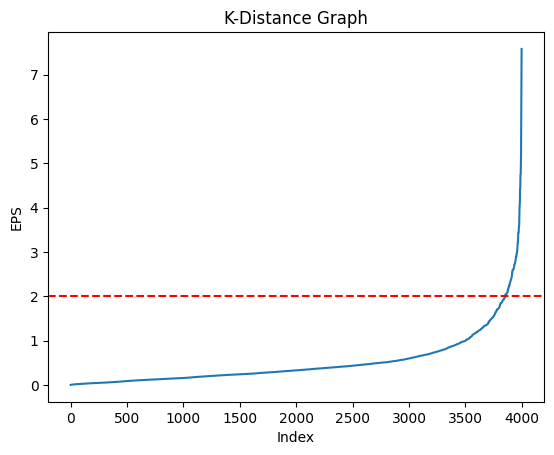

In [1086]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color='red') # y=2 means draw horizontal lint at eps=2
plt.xlabel('Index')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [1088]:
 #Model Evaluation

In [1090]:
db = DBSCAN(eps=2,min_samples=3) # consider eps=2, try min_samples as 7 or 13 by rule 2 and 3 and check silhouette score
yp = db.fit_predict(x)
yp
# outliers are reduced, Max clusters:1 i.e. only one cluster: cluster 0

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

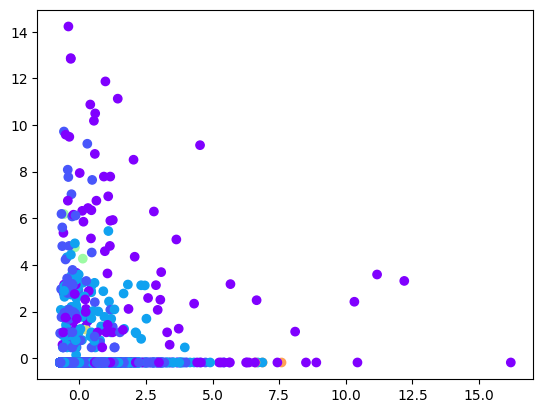

In [1096]:
plt.scatter(x[:,1],x[:,2],c=yp,cmap='rainbow') 


In [1098]:
silhouette_score(x,yp) # good score

0.20982236466880683

In [1100]:
# Analyze the clusters
df['Cluster'] = yp
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [1102]:
df[df['Cluster'] == -1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
70,72,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3920,179832,2954,3,1,1,18218,20,2500,5,1569,1,-1
3902,3925,13004,1000,1,1,1,13890,39,0,0,1572,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,-1


In [1104]:
df[df['Cluster'] == -1].shape[0]

171

In [1106]:
df['Cluster'].value_counts()

Cluster
 0    2451
 1    1331
-1     171
 3      16
 7       9
 2       7
 5       4
 8       4
 6       3
 4       3
Name: count, dtype: int64

In [1108]:
# extract only normal data points
data = df[df['Cluster']==0]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
